In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

## Preparing the Dataset
$ a * b = y == \ln(a) + \ln(b) = \ln(y) $

The validation set has been defined as a parameter of the model.fit () function. It was generated from 10% of the training data set.

In [66]:
import random as rnd

X_train = []
Y_train = []

# X_val = []
# Y_val = []

X_test = []
Y_test = []

for i in range( 10000 ): ## train data random
    r1 = rnd.randint(1, 90) 
    r2 = rnd.randint(1, 100)
    X_train.append( [   np.log( r1 ) , np.log( r2 ) ] )
    Y_train.append( [1, np.log( r1 ) + np.log( r2 ) ] ) ## case: 1
    
    r1 = rnd.randint(1, 90) 
    r2 = rnd.randint(1, 100)
    X_train.append( [   -np.log( r1 ) , np.log( r2 ) ] )
    Y_train.append( [-1, np.log( r1 ) + np.log( r2 ) ] ) ## case: 2
    
    r1 = rnd.randint(1, 90)
    r2 = rnd.randint(1, 100)
    X_train.append( [    np.log( r1 ) , -np.log( r2 ) ] )
    Y_train.append( [-1, np.log( r1 ) +  np.log( r2 ) ] ) ## case: 3
    
    r1 = rnd.randint(1, 90)
    r2 = rnd.randint(1, 100)
    X_train.append( [   -np.log( r1 ) , -np.log( r2 ) ] )
    Y_train.append( [1,  np.log( r1 ) +  np.log( r2 ) ] ) ## case: 4
    
#for a in range(81, 91): ## validation_data ( Not used as manually. Used automatically in model.fit() )
#    for b in range(1, 101):
#        X_val.append( [   np.log( a ) , np.log( b ) ] )
#        Y_val.append( [1, np.log( a ) + np.log( b ) ] )
        
#        X_val.append( [   -np.log( a ) , np.log( b ) ] )
#        Y_val.append( [-1, np.log( a ) + np.log( b ) ] )
        
#        X_val.append( [    np.log( a ) , -np.log( b ) ] )
#        Y_val.append( [-1, np.log( a ) +  np.log( b ) ] )
        
#        X_val.append( [  -np.log( a ) , -np.log( b ) ] )
#        Y_val.append( [1, np.log( a ) +  np.log( b ) ] )
        
for a in range(91, 101): ## test_data
    for b in range(1, 101):
        X_test.append( [   np.log( a ) , np.log( b ) ] )
        Y_test.append( [1, np.log( a ) + np.log( b ) ] )
        
        X_test.append( [   -np.log( a ) , np.log( b ) ] )
        Y_test.append( [-1, np.log( a ) + np.log( b ) ] )
        
        X_test.append( [    np.log( a ) , -np.log( b ) ] )
        Y_test.append( [-1, np.log( a ) +  np.log( b ) ] )
        
        X_test.append( [  -np.log( a ) , -np.log( b ) ] )
        Y_test.append( [1, np.log( a ) +  np.log( b ) ] )
        
X_train = np.array( X_train )        
Y_train = np.array( Y_train )

# X_val = np.array( X_val )        
# Y_val = np.array( Y_val )

X_test = np.array( X_test )        
Y_test = np.array( Y_test )

print( f"Train Set Size      : {X_train.shape}" )
# print( f"Validation Set Size : {X_val.shape}"   )
print( f"Test Set Size       : {X_test.shape}"   )

Train Set Size      : (40000, 2)
Test Set Size       : (4000, 2)


## MODEL

In [67]:
model = tf.keras.Sequential()
model.add(layers.Dense(50, input_dim=2, activation=tf.nn.relu))
model.add(layers.Dense(50, activation=tf.nn.relu))
model.add(layers.Dense(2 , activation='linear'))

model.summary()
model.compile( optimizer='adam', loss='MSE', metrics=['accuracy'] )

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 50)                150       
_________________________________________________________________
dense_22 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 102       
Total params: 2,802
Trainable params: 2,802
Non-trainable params: 0
_________________________________________________________________


### Pre-Trained Model

In [121]:
model = tf.keras.models.load_model( "model_1.h5" )

# Show the model architecture
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 50)                150       
_________________________________________________________________
dense_82 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_83 (Dense)             (None, 2)                 102       
Total params: 2,802
Trainable params: 2,802
Non-trainable params: 0
_________________________________________________________________


### Load Saved Dataset

In [65]:
with open('train.npy', 'rb') as f:
    X_train = np.load(f)
    Y_train = np.load(f)
    
#with open('validation.npy', 'rb') as f:
#    X_val = np.load(f)
#    Y_val = np.load(f)
    
with open('test.npy', 'rb') as f:
    X_test = np.load(f)
    Y_test = np.load(f)

print( f"Datasets have been loaded." )
print( f"Train Set Size      : {X_train.shape}" )
# print( f"Validation Set Size : {X_val.shape}"   )
print( f"Test Set Size       : {X_test.shape}"   )

Datasets have been loaded.
Train Set Size      : (40000, 2)
Test Set Size       : (4000, 2)


## Training

In [68]:
history = model.fit( X_train, Y_train, validation_split=0.1, 
                    epochs=250 )


Epoch 1/250
1125/1125 [==============================] - 1s 421us/step - loss: 2.5426 - accuracy: 0.9777 - val_loss: 0.0261 - val_accuracy: 1.0000
Epoch 2/250
1125/1125 [==============================] - 0s 367us/step - loss: 0.0238 - accuracy: 0.9997 - val_loss: 0.0171 - val_accuracy: 0.9998
Epoch 3/250
1125/1125 [==============================] - 0s 344us/step - loss: 0.0171 - accuracy: 0.9998 - val_loss: 0.0144 - val_accuracy: 0.9998
Epoch 4/250
1125/1125 [==============================] - 0s 340us/step - loss: 0.0152 - accuracy: 0.9998 - val_loss: 0.0128 - val_accuracy: 0.9998
Epoch 5/250
1125/1125 [==============================] - 0s 337us/step - loss: 0.0132 - accuracy: 0.9999 - val_loss: 0.0111 - val_accuracy: 0.9998
Epoch 6/250
1125/1125 [==============================] - 0s 360us/step - loss: 0.0128 - accuracy: 0.9999 - val_loss: 0.0110 - val_accuracy: 0.9998
Epoch 7/250
1125/1125 [==============================] - 0s 335us/step - loss: 0.0124 - accuracy: 0.9999 - val_loss: 0

1125/1125 [==============================] - 0s 337us/step - loss: 0.0108 - accuracy: 0.9998 - val_loss: 0.0103 - val_accuracy: 0.9998
Epoch 57/250
1125/1125 [==============================] - 0s 333us/step - loss: 0.0122 - accuracy: 0.9999 - val_loss: 0.0106 - val_accuracy: 0.9998
Epoch 58/250
1125/1125 [==============================] - 0s 334us/step - loss: 0.0104 - accuracy: 0.9999 - val_loss: 0.0108 - val_accuracy: 0.9998
Epoch 59/250
1125/1125 [==============================] - 0s 334us/step - loss: 0.0108 - accuracy: 0.9998 - val_loss: 0.0105 - val_accuracy: 0.9998
Epoch 60/250
1125/1125 [==============================] - 0s 334us/step - loss: 0.0106 - accuracy: 0.9999 - val_loss: 0.0106 - val_accuracy: 0.9998
Epoch 61/250
1125/1125 [==============================] - 0s 335us/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9998
Epoch 62/250
1125/1125 [==============================] - 0s 333us/step - loss: 0.0119 - accuracy: 0.9999 - val_loss: 0.0101 

1125/1125 [==============================] - 0s 335us/step - loss: 0.0106 - accuracy: 0.9998 - val_loss: 0.0101 - val_accuracy: 0.9998
Epoch 112/250
1125/1125 [==============================] - 0s 333us/step - loss: 0.0108 - accuracy: 0.9999 - val_loss: 0.0106 - val_accuracy: 0.9998
Epoch 113/250
1125/1125 [==============================] - 0s 333us/step - loss: 0.0114 - accuracy: 0.9999 - val_loss: 0.0106 - val_accuracy: 0.9998
Epoch 114/250
1125/1125 [==============================] - 0s 335us/step - loss: 0.0107 - accuracy: 0.9998 - val_loss: 0.0112 - val_accuracy: 0.9998
Epoch 115/250
1125/1125 [==============================] - 0s 334us/step - loss: 0.0103 - accuracy: 0.9999 - val_loss: 0.0103 - val_accuracy: 0.9998
Epoch 116/250
1125/1125 [==============================] - 0s 332us/step - loss: 0.0112 - accuracy: 0.9998 - val_loss: 0.0107 - val_accuracy: 0.9998
Epoch 117/250
1125/1125 [==============================] - 0s 334us/step - loss: 0.0099 - accuracy: 0.9998 - val_loss: 0

1125/1125 [==============================] - 0s 343us/step - loss: 0.0111 - accuracy: 0.9999 - val_loss: 0.0104 - val_accuracy: 0.9998
Epoch 167/250
1125/1125 [==============================] - 0s 356us/step - loss: 0.0115 - accuracy: 0.9998 - val_loss: 0.0107 - val_accuracy: 0.9995
Epoch 168/250
1125/1125 [==============================] - 0s 349us/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9995
Epoch 169/250
1125/1125 [==============================] - 0s 351us/step - loss: 0.0113 - accuracy: 0.9999 - val_loss: 0.0105 - val_accuracy: 0.9998
Epoch 170/250
1125/1125 [==============================] - 0s 342us/step - loss: 0.0099 - accuracy: 0.9997 - val_loss: 0.0107 - val_accuracy: 0.9998
Epoch 171/250
1125/1125 [==============================] - 0s 337us/step - loss: 0.0111 - accuracy: 0.9998 - val_loss: 0.0103 - val_accuracy: 0.9998
Epoch 172/250
1125/1125 [==============================] - 0s 343us/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0

1125/1125 [==============================] - 0s 347us/step - loss: 0.0106 - accuracy: 0.9999 - val_loss: 0.0101 - val_accuracy: 0.9998
Epoch 222/250
1125/1125 [==============================] - 0s 363us/step - loss: 0.0104 - accuracy: 0.9998 - val_loss: 0.0101 - val_accuracy: 0.9998
Epoch 223/250
1125/1125 [==============================] - 0s 337us/step - loss: 0.0112 - accuracy: 0.9999 - val_loss: 0.0108 - val_accuracy: 0.9998
Epoch 224/250
1125/1125 [==============================] - 0s 337us/step - loss: 0.0110 - accuracy: 0.9999 - val_loss: 0.0103 - val_accuracy: 0.9998
Epoch 225/250
1125/1125 [==============================] - 0s 347us/step - loss: 0.0106 - accuracy: 0.9998 - val_loss: 0.0102 - val_accuracy: 0.9995
Epoch 226/250
1125/1125 [==============================] - 0s 337us/step - loss: 0.0103 - accuracy: 0.9998 - val_loss: 0.0102 - val_accuracy: 0.9998
Epoch 227/250
1125/1125 [==============================] - 0s 334us/step - loss: 0.0109 - accuracy: 0.9999 - val_loss: 0

## Testing and Evaluating

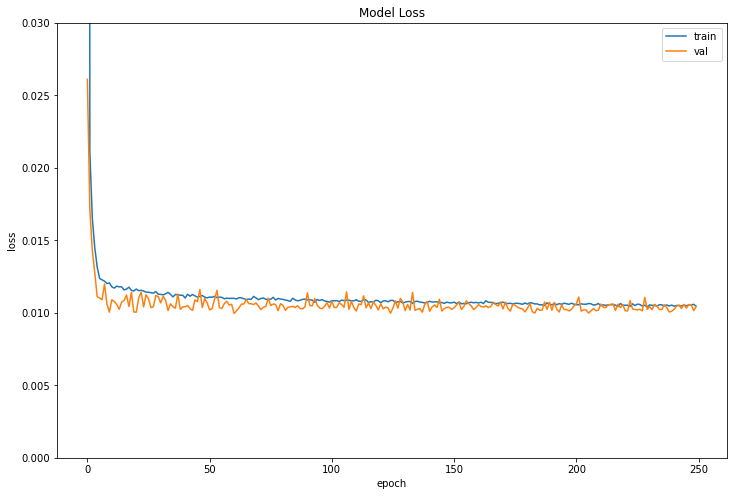

In [69]:
# summarize history for loss
plt.figure( figsize=(12,8) )
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.ylim([0, 0.03])
plt.show()

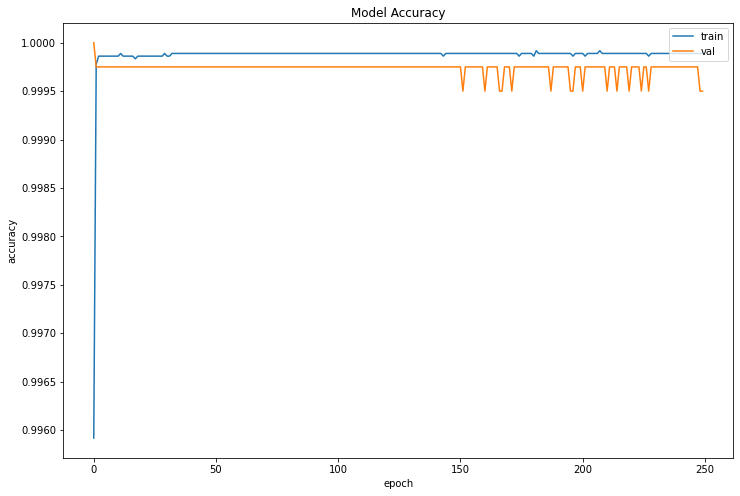

In [70]:
# summarize history for Accuracy
plt.figure( figsize=(12,8) )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [71]:
loss_test = model.evaluate(X_test, Y_test, verbose=0)
print( 'Test loss: %.4f' % loss_test[0] )

Test loss: 0.0054


In [72]:
Y_pred = model.predict(X_train)
mse = mean_squared_error(Y_train, Y_pred)
print('MSE: %f' % mse)

MSE: 0.010364


"multiply_ML()" function takes two numbers and finds signs of these numbers. Then the absolute value of these numbers is taken. Accordingly, the signs of these numbers and the "ln()" value of their absolute values are sent to the network. 

The network outputs 2-D vector. In this way, we can obtain the sign and the result of the multiplication as separate results and combine them.. 

In [73]:
def multiply_ML(num1, num2):
    
    num1_abs = np.abs(num1)
    num2_abs = np.abs(num2)
    
    if np.abs( num1 ) != num1 and np.abs( num2 ) == num2:
        test = np.array( [ -np.log( num1_abs ), np.log( num2_abs ) ] ).reshape( -1, 1 ).T
    elif np.abs( num1 ) == num1 and np.abs( num2 ) != num2:
        test = np.array( [ np.log( num1_abs ), -np.log( num2_abs ) ] ).reshape( -1, 1 ).T
    elif np.abs( num1 ) != num1 and np.abs( num2 ) != num2:
        test = np.array( [ -np.log( num1_abs ), -np.log( num2_abs ) ] ).reshape( -1, 1 ).T
    else:
        test = np.array( [ np.log( num1_abs ), np.log( num2_abs ) ] ).reshape( -1, 1 ).T
        
    [(sign, pred)] = model.predict( test )
    
    if sign > 0:
        pred =  1 * np.exp( pred )
    else:
        pred = -1 * np.exp( pred )

    return pred
        

In [82]:
print( f"  10    x  2     => predicted : {multiply_ML(10, 2)}    \treal : {10 * 2}" )
print( f"  3.5   x  4     => predicted : {multiply_ML(3.5, 4)}   \treal : {3.5 * 4}" )
print( f" -5     x  4     => predicted : {multiply_ML(-5, 4)}    \treal : {-5 * 4}" )
print( f"  10.5  x  -1.5  => predicted : {multiply_ML(10.5, -1.5)}   \treal : {10.5 * -1.5}" ) 
print( f"  200   x  200   => predicted : {multiply_ML(200, 200)}         \treal : {200 * 200}" ) 
print( f"  -1.5  x  48.6  => predicted : {multiply_ML(-1.5, 48.6)}    \treal : {-1.5 * 48.6}" ) 
print( f"  1.5   x  48.6  => predicted : {multiply_ML(1.5, 48.6)}   \treal : {1.5 * 48.6}" ) 
print( f"  36    x  34    => predicted : {multiply_ML(36, 34)}     \treal : {36 * 34}" ) 

  10    x  2     => predicted : 20.217973709106445    	real : 20
  3.5   x  4     => predicted : 14.010910034179688   	real : 14.0
 -5     x  4     => predicted : -20.495258331298828    	real : -20
  10.5  x  -1.5  => predicted : -12.832018852233887   	real : -15.75
  200   x  200   => predicted : 40478.5         	real : 40000
  -1.5  x  48.6  => predicted : -69.84831237792969    	real : -72.9
  1.5   x  48.6  => predicted : 71.00475311279297   	real : 72.9
  36    x  34    => predicted : 1226.415771484375     	real : 1224


In [75]:
## Model fails when one of the numbers is between 0 and 1
print( f" 21 x 0.5 => predicted : {multiply_ML(21, 0.5)}   real : {21 * 0.5}" ) ## 

 21 x 0.5 => predicted : -41.640380859375   real : 10.5


In [76]:
multiply_ML(2, -2)

-4.103412628173828

### Save Dataset

In [205]:
with open('train.npy', 'wb') as f:
    np.save(f, X_train)
    np.save(f, Y_train)
    
with open('validation.npy', 'wb') as f:
    np.save(f, X_val)
    np.save(f, Y_val)
    
with open('test.npy', 'wb') as f:
    np.save(f, X_test)
    np.save(f, Y_test)

## Save Model

In [184]:
model.save("model_1.h5")